In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import scipy.stats as stat
import pylab 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# DATA PRE-PROCESSING

In [2]:
# Load the dataset
df=pd.read_csv('heart_disease.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [4]:
df.shape

(920, 15)

In [5]:
# Drop unnecessary column
df=df.drop(["id"],axis=1)

In [6]:
# Identify numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtypes !='object']
categorical_features= [feature for feature in df.columns if df[feature].dtypes =='object']
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<20]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]

<Axes: >

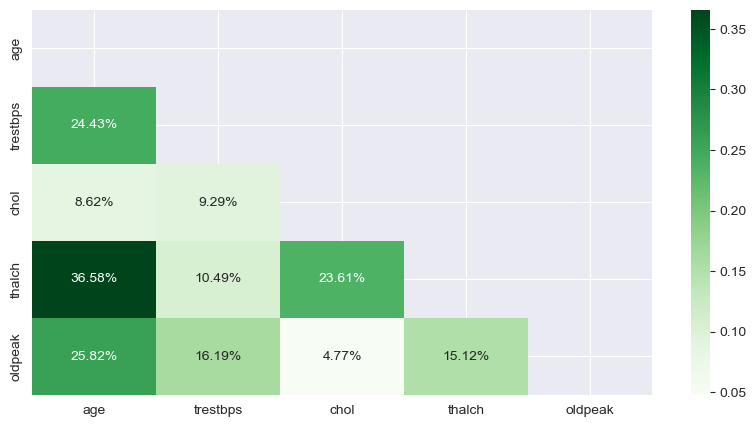

In [7]:
# Correlation of continuous features
plt.figure(figsize=(10, 5))
sns.heatmap(df[continuous_feature].corr().abs(), cmap='Greens',mask=np.triu(df[continuous_feature].corr()),fmt = '.2%', annot=True)

# MISSING VALUES

<Axes: title={'center': 'Heatmap of Missing Values'}>

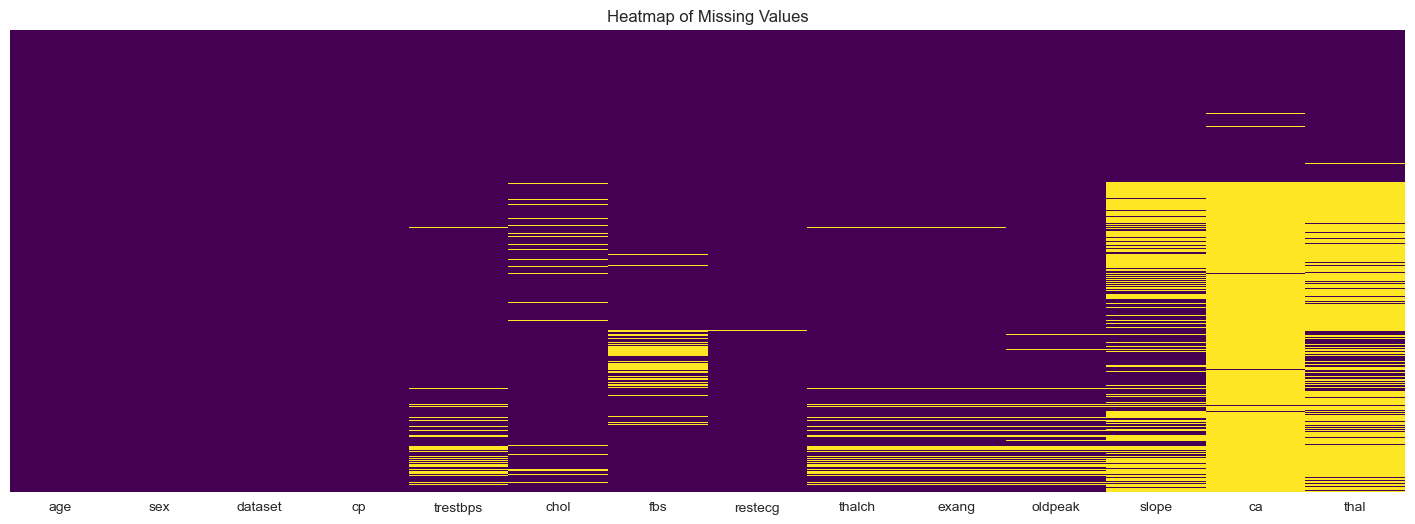

In [8]:
### Check missing data through a heatmap:
plt.figure(figsize=(18,6))
plt.title('Heatmap of Missing Values')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
# Check the percentage rates of missing data through the list:

features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, ' % ',np.round(df[feature].isnull().mean(), 4),  'missing values')

trestbps  %  0.0641 missing values
chol  %  0.0326 missing values
fbs  %  0.0978 missing values
restecg  %  0.0022 missing values
thalch  %  0.0598 missing values
exang  %  0.0598 missing values
oldpeak  %  0.0674 missing values
slope  %  0.3359 missing values
ca  %  0.6641 missing values
thal  %  0.5283 missing values


<Axes: title={'center': 'Correlation of Missing Values'}>

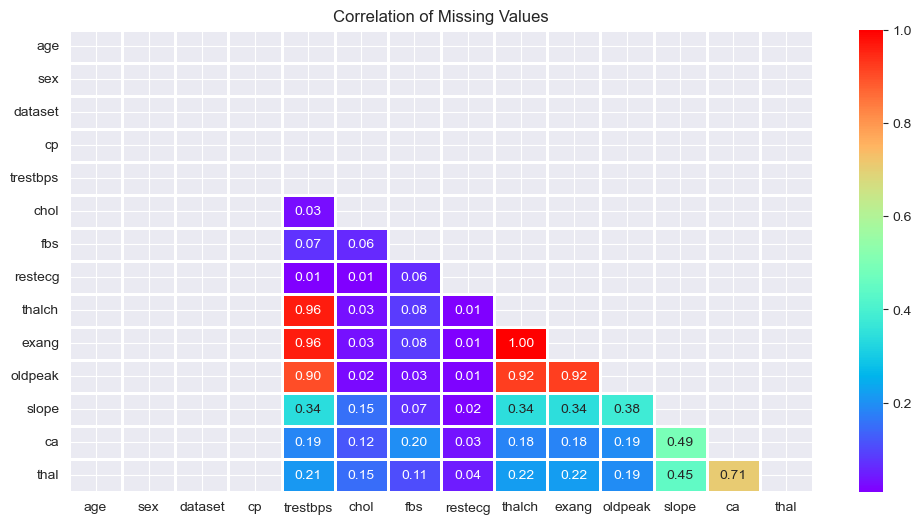

In [10]:
# Analyze the correlations of missing data with each other (based on absolute values (abs)):

plt.figure(figsize=(12, 6))
plt.title('Correlation of Missing Values')
sns.heatmap(df.isnull().corr().abs(), cmap='rainbow',linewidths = 1,mask=np.triu(df.isnull().corr()),fmt = '.2f', annot=True)

In [11]:
# Fill missing values

df[['thalch']]=df[['thalch']].fillna(0)
df[['oldpeak']]=df[['oldpeak']].fillna(0)
df[['chol']]=df[['chol']].fillna(0)
df[['trestbps']]=df[['trestbps']].fillna(0)
df[['ca']]=df[['ca']].fillna(0)
df[['exang']]=df[['exang']].fillna('None')
df[['restecg']]=df[['restecg']].fillna('None')
df[['fbs']]=df[['fbs']].fillna('None')
df[['thal']]=df[['thal']].fillna('None')
df[['slope']]=df[['slope']].fillna('None')

# FEATURE ENGINEERING

In [12]:
df['oldpeak'].unique()

array([ 2.3,  1.5,  2.6,  3.5,  1.4,  0.8,  3.6,  0.6,  3.1,  0.4,  1.3,
        0. ,  0.5,  1.6,  1. ,  1.2,  0.2,  1.8,  3.2,  2.4,  2. ,  2.5,
        2.2,  2.8,  3. ,  3.4,  6.2,  4. ,  5.6,  2.9,  0.1,  2.1,  1.9,
        4.2,  0.9,  1.1,  3.8,  0.7,  0.3,  4.4,  5. , -1.1, -1.5, -0.1,
       -2.6, -0.7, -2. , -1. ,  1.7, -0.8, -0.5, -0.9,  3.7])

In [13]:
# Example Oldpeak classification
def classify_oldpeak(oldpeak_value):
    if oldpeak_value < -2.5:
        return 'Severe ST Depression'
    elif -2.5 <= oldpeak_value < -1:
        return 'Moderate ST Depression'
    elif -1 <= oldpeak_value < 0:
        return 'Mild ST Depression'
    elif 0 <= oldpeak_value < 1:
        return 'Mild ST Elevation'
    elif 1 <= oldpeak_value < 2:
        return 'Moderate ST Elevation'
    else:
        return 'Severe ST Elevation'

# Apply to DataFrame
df['Oldpeak_Category'] = df['oldpeak'].apply(classify_oldpeak)


In [14]:
cholesterol_values = np.array([199, 200, 240])
low_limit = 200
high_limit = 240
df['Cholesterol_Group'] = np.where(df['chol'] <= low_limit, 0, np.where(df['chol']< high_limit, 1, 2)).astype(int)

In [15]:
df['Age_Group'] = pd.cut(df['age'], bins=[19, 29, 49, 64, 99], labels = [0, 1, 2, 3]).astype('int16')

In [16]:
# Normal Resting Blood Pressure:
# Systolic: 90 - 120 mmHg
# Diastolic: 60 - 80 mmHg
# However, these values may vary depending on individual factors and health conditions.
# Additionally, classifications for hypertension (high blood pressure) are typically as follows:

# Normal: Systolic < 120 mmHg and Diastolic < 80 mmHg
# Elevated: Systolic 120-129 mmHg and Diastolic < 80 mmHg
# Hypertension Stage 1: Systolic 130-139 mmHg or Diastolic 80-89 mmHg
# Hypertension Stage 2: Systolic ≥ 140 mmHg or Diastolic ≥ 90 mmHg

normal_trestbps = (60, 120)  # Normal systolic blood pressure range
df['trestbps_Group'] = np.where(
    df['trestbps'] <= low_limit, 0,
    np.where(df['trestbps'] < high_limit, 1, 2)
).astype(int)


In [17]:
#Normal: 120≤Thalach≤160
normal_thalch=(60,120)
df['thalch_Group'] = np.where(np.logical_and(df['thalch'] >= normal_thalch[0] , df['thalch']<=normal_thalch[1]), 1, 0).astype(int)

In [18]:
# Remove redundant columns
df=df.drop(['chol','age','trestbps'],axis=1)

# ENCODING

In [19]:
# Encode categorical features
df=pd.get_dummies(df, drop_first=True, dtype=int)

In [20]:
df.head()

,thalch,oldpeak,ca,Cholesterol_Group,Age_Group,trestbps_Group,thalch_Group,sex_Male,dataset_Hungary,dataset_Switzerland,...,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,Oldpeak_Category_Mild ST Elevation,Oldpeak_Category_Moderate ST Depression,Oldpeak_Category_Moderate ST Elevation,Oldpeak_Category_Severe ST Depression,Oldpeak_Category_Severe ST Elevation
0,150.0,2.3,0.0,1,2,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,108.0,1.5,3.0,2,3,0,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0
2,129.0,2.6,2.0,1,3,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
3,187.0,3.5,0.0,2,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,172.0,1.4,0.0,1,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [21]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes !='object']
categorical_features= [feature for feature in df.columns if df[feature].dtypes =='object']
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<20]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]

# OUTLIERS

<Figure size 3000x12000 with 0 Axes>

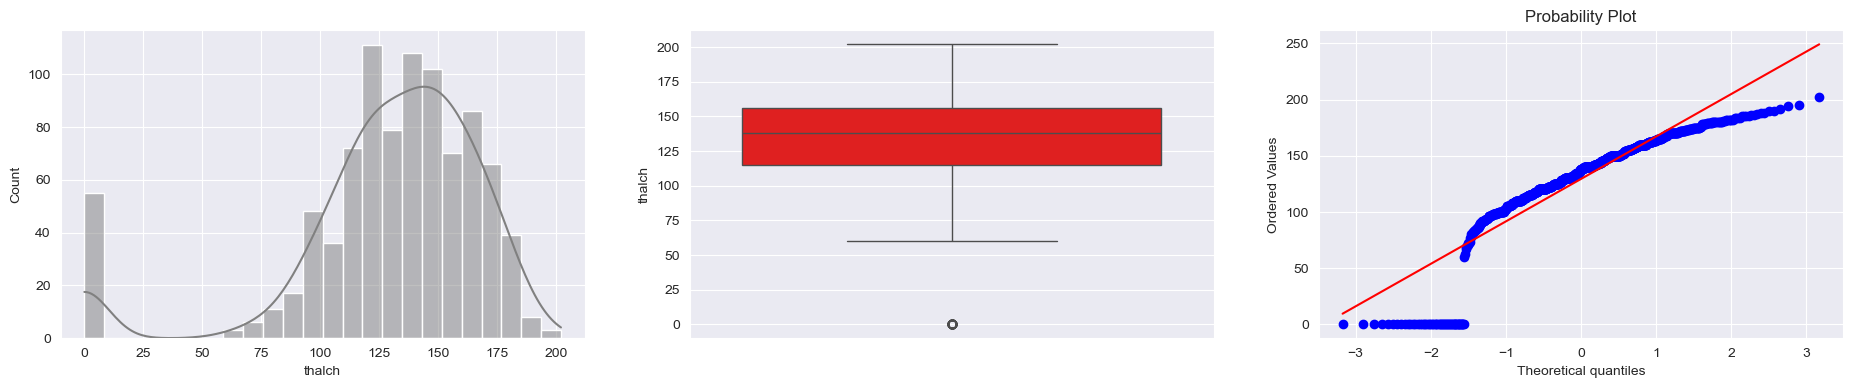

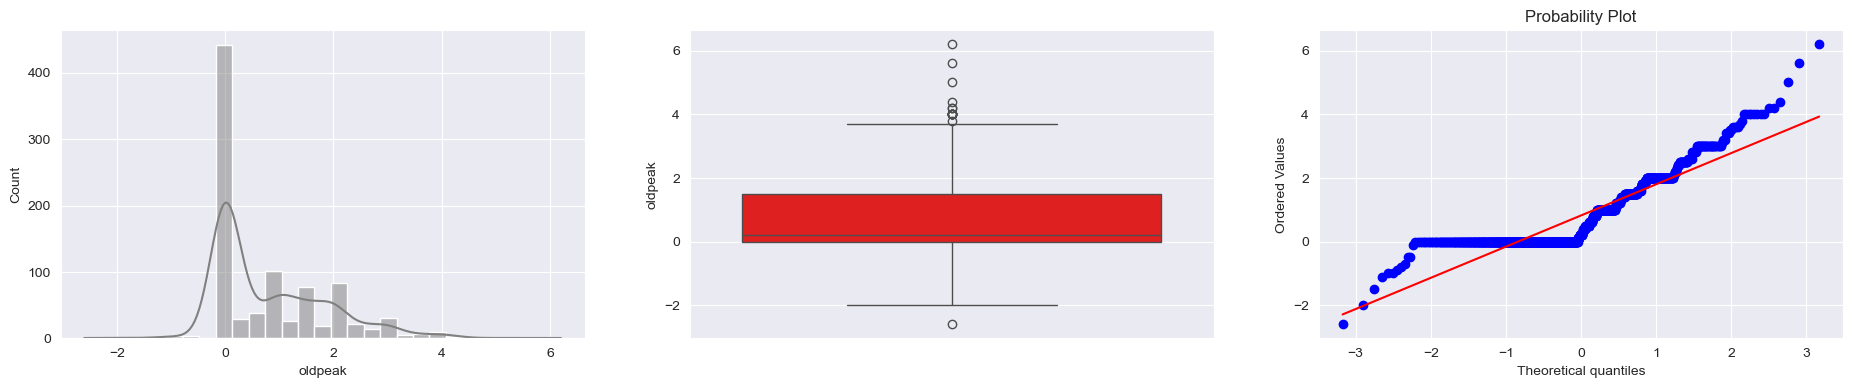

In [22]:
### Perform preliminary checks on continuous numerical variables using histograms.
### If there are any skewness or outliers, address them.

plt.figure(figsize=(30, 120), facecolor='white')
plotnumber = 1
for feature in continuous_feature:
    plt.figure(figsize=(23, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(df[feature], color="gray", kde=True)
    plt.subplot(1, 3, 2)
    sns.boxplot(df[feature], color='red')
    plt.subplot(1, 3, 3)
    stat.probplot(df[feature], dist='norm', plot=pylab)
plt.show()


In [23]:
# Outlier treatment

for col in continuous_feature:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    df[col]= np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

<Figure size 3000x12000 with 0 Axes>

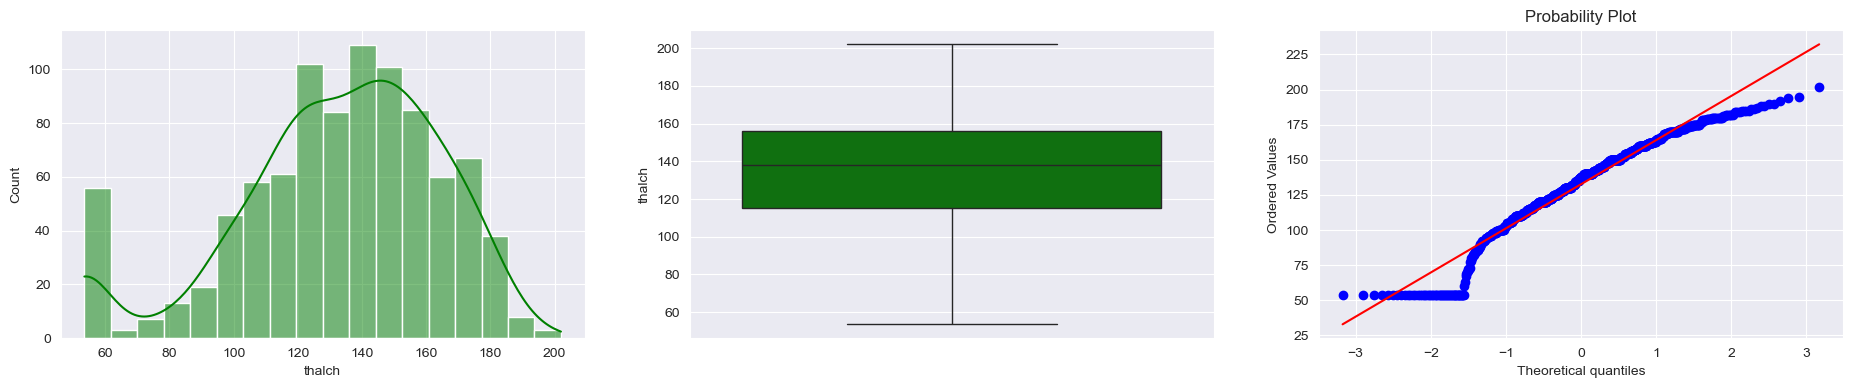

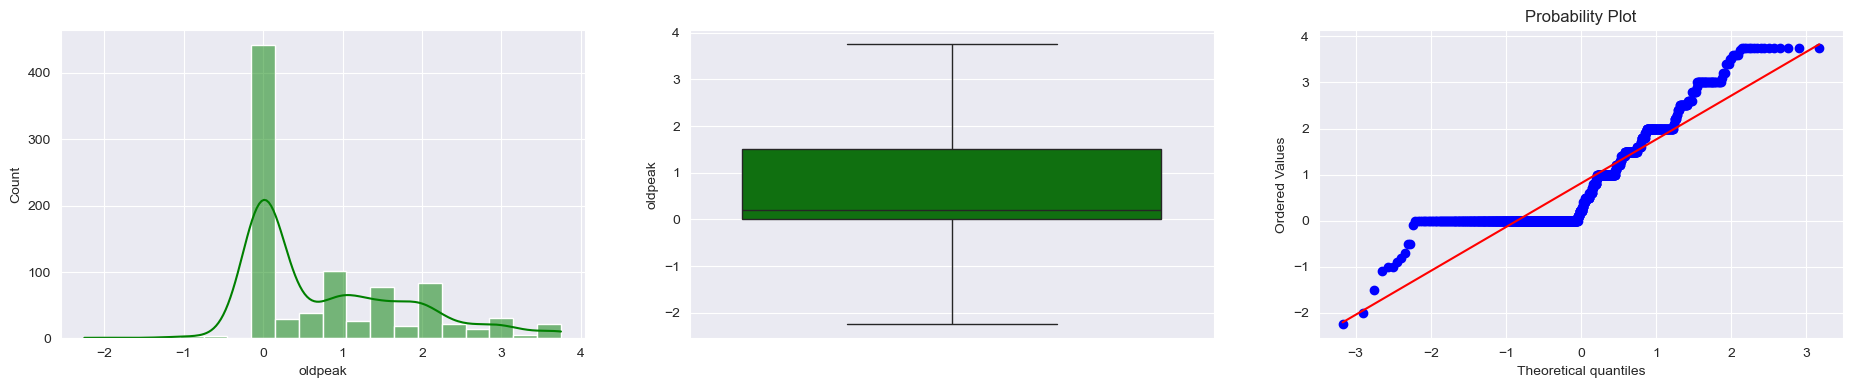

In [24]:
# Visualization of continuous features after outlier treatment

plt.figure(figsize=(30,120),facecolor='white')
plotnumber=1
for feature in continuous_feature:
                plt.figure(figsize=(23,4))
                plt.subplot(1,3,1)
                sns.histplot(df[feature],color="green", kde=True)
                plt.subplot(1,3,2)
                sns.boxplot(df[feature],color='green')
                plt.subplot(1,3,3)
                stat.probplot(df[feature],dist='norm',plot=pylab)
plt.show()

# MODELLING

In [25]:
X = df.iloc[:, ].values
X

array([[150. ,   2.3,   0. , ...,   0. ,   0. ,   1. ],
       [108. ,   1.5,   3. , ...,   1. ,   0. ,   0. ],
       [129. ,   2.6,   2. , ...,   0. ,   0. ,   1. ],
       ...,
       [100. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [ 53.5,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [ 93. ,   0. ,   0. , ...,   0. ,   0. ,   0. ]])

In [26]:
from sklearn.cluster import KMeans

# Elbow method to find the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

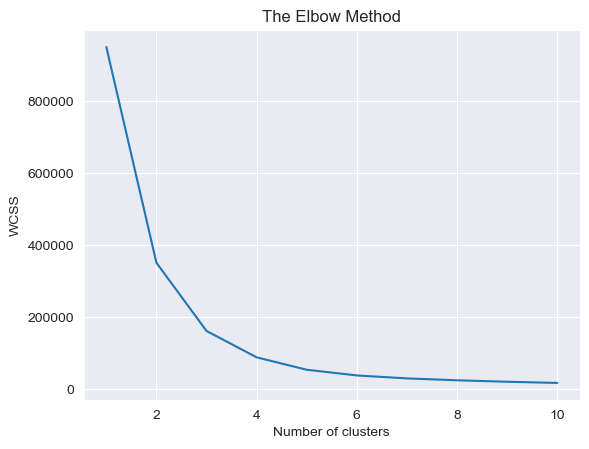

In [27]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for different numbers of clusters
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Number of Clusters = {n_clusters}, Silhouette Score = {silhouette_avg}")


Number of Clusters = 2, Silhouette Score = 0.5513619367779106
Number of Clusters = 3, Silhouette Score = 0.5718343136502221
Number of Clusters = 4, Silhouette Score = 0.532004461737926
Number of Clusters = 5, Silhouette Score = 0.5251091047120158
Number of Clusters = 6, Silhouette Score = 0.5126278736273635
Number of Clusters = 7, Silhouette Score = 0.48705277176895284
Number of Clusters = 8, Silhouette Score = 0.47253583501790847
Number of Clusters = 9, Silhouette Score = 0.4666546012329914
Number of Clusters = 10, Silhouette Score = 0.4721032653951084


In [29]:
# Final clustering with 2 clusters
kmeans = KMeans(n_clusters = 2, init = 'k-means++', n_init=10)

y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0
 0 1 0 0 1 1 0 0 0 1 1 1 

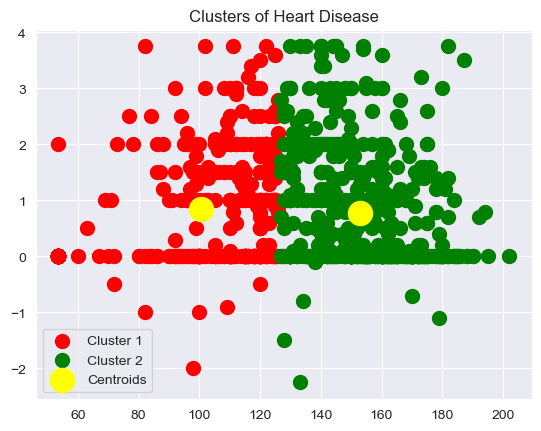

In [30]:
# Cluster visualization
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Heart Disease')
plt.legend()
plt.show()